In [1]:
#Juan Sebastian Luna Sanchez
#Analisis de datos
#Ingenieria de Sistemas
#UNAD
#Arboles de Decision

from imblearn.over_sampling import SMOTE

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree

In [3]:
from imblearn.over_sampling import SMOTE
import pandas as pd

In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree

In [6]:
import numpy as np  # Agrega esta línea para importar NumPy

In [7]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pydotplus
print(pydotplus.find_graphviz())

{'dot': 'C:\\Program Files (x86)\\Graphviz\\bin\\dot.exe', 'twopi': 'C:\\Program Files (x86)\\Graphviz\\bin\\twopi.exe', 'neato': 'C:\\Program Files (x86)\\Graphviz\\bin\\neato.exe', 'circo': 'C:\\Program Files (x86)\\Graphviz\\bin\\circo.exe', 'fdp': 'C:\\Program Files (x86)\\Graphviz\\bin\\fdp.exe', 'sfdp': 'C:\\Program Files (x86)\\Graphviz\\bin\\sfdp.exe'}


In [9]:
data_wine = pd.read_csv("C:/Users/sluna/Documents/Universidad/9no Semestre/Analisis de Datos/Tarea 2/Dataset Arboles de Decisión/wine.data",
                        header=None,
                        names=["Clase", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]) 

In [10]:
data_wine

,Clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Clase                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [12]:
data_wine.head()

,Clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# to check the if the class is balance
print(data_wine.groupby('Clase').size())

Clase
1    59
2    71
3    48
dtype: int64


In [14]:
# Crear una instancia de SMOTE
sm = SMOTE(random_state=7)

# Ajustar el modelo y generar los datos sobremuestreados
oversampled_trainX, oversampled_trainY = sm.fit_resample(data_wine.drop('Clase', axis=1), data_wine['Clase'])

# Crear un DataFrame con los datos sobremuestreados
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = data_wine.columns

In [15]:
# to chech the class
print(oversampled_train.groupby('Clase').size())

Clase
1    71
2    71
3    71
dtype: int64


In [16]:
def importdata():
    data_wine = oversampled_train
    return data_wine

In [17]:
def splitdataset(data_wine):
    
    # Seperating the target variable
    X = data_wine.values[:,1:]  
    y = data_wine.values[:,0] 

    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify =y)
    
    # transform data so its distribution will have a mean value 0 and standard deviation of 1
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))
    
    return X, y, X_train, X_test, y_train, y_test

In [18]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    #clf_gini = DecisionTreeClassifier(criterion = "gini", 
    #        random_state = 100,max_depth=8, min_samples_leaf=3)
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini

In [19]:
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy

In [20]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    return y_pred

In [21]:
# Function to show prediction values
def pred_result (data_wine,y_test,y_pred_clf):

    data_wine_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_clf})
    data_wine_new['result'] = np.where(data_wine_new['Actual'] == data_wine_new['Predicted'], 'correct', 'wrong')
    print(data_wine_new)

In [22]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", 
    confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : \n", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : \n", 
    classification_report(y_test, y_pred))

In [23]:
# Function to draw decision tree
def draw_dt (data_wine,clf_object):
    
    graph = Source(tree.export_graphviz(clf_object, out_file=None
                                        , feature_names= data_wine.iloc[:, 1:].columns, class_names=['1', '2', '3'] 
                                        , filled = True))
    display(SVG(graph.pipe(format='svg')))

In [24]:
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("\n\033[1m"+"Results Using Gini Index:"+"\033[0;0m") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini)
    
    #Prediction result
    pred_result(data,y_test,y_pred_gini)
    
     # Draw tree
    draw_dt (data,clf_gini)
    
    print("\n\n\033[1m" + "Results Using Entropy:"+"\033[0;0m") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy)
    
    #Prediction result
    pred_result(data,y_test,y_pred_entropy)

    # Draw tree
    draw_dt (data,clf_entropy)

In [25]:
import sys

In [26]:
# A continuación, puedes usar NumPy en tu código
np.set_printoptions(threshold=sys.maxsize)

There are 149 samples in the training set and 64 samples in the test set

Results Using Gini Index:
Confusion Matrix: 
 [[19  3  0]
 [ 2 19  0]
 [ 0  1 20]]
Accuracy : 
 90.625
Report : 
               precision    recall  f1-score   support

         1.0       0.90      0.86      0.88        22
         2.0       0.83      0.90      0.86        21
         3.0       1.00      0.95      0.98        21

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64

    Actual  Predicted   result
0      1.0        1.0  correct
1      2.0        2.0  correct
2      1.0        1.0  correct
3      1.0        1.0  correct
4      1.0        1.0  correct
..     ...        ...      ...
59     2.0        2.0  correct
60     3.0        3.0  correct
61     3.0        3.0  correct
62     2.0        2.0  correct
63     3.0        3.0  correct

[64 rows x 3 columns]


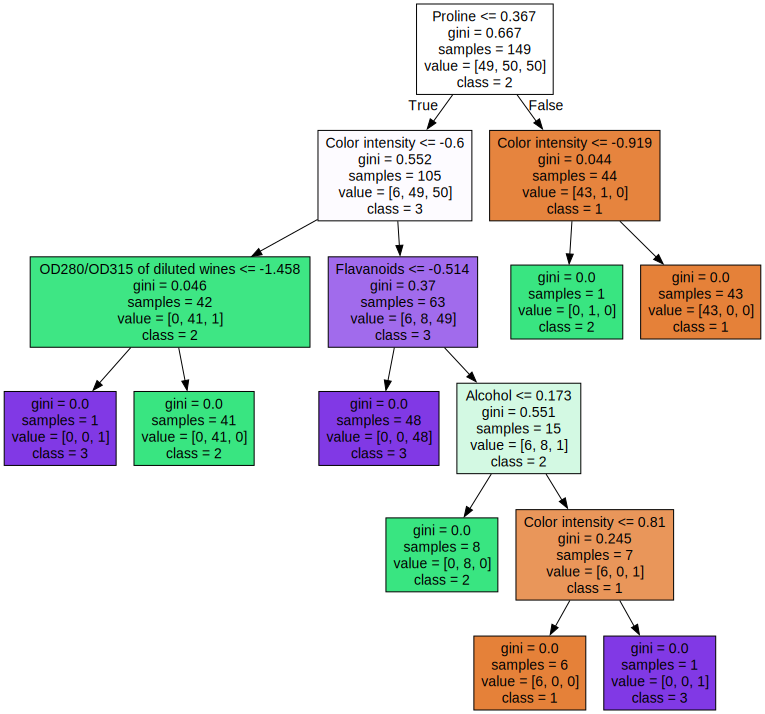



Results Using Entropy:
Confusion Matrix: 
 [[19  3  0]
 [ 3 18  0]
 [ 0  0 21]]
Accuracy : 
 90.625
Report : 
               precision    recall  f1-score   support

         1.0       0.86      0.86      0.86        22
         2.0       0.86      0.86      0.86        21
         3.0       1.00      1.00      1.00        21

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64

    Actual  Predicted   result
0      1.0        1.0  correct
1      2.0        2.0  correct
2      1.0        1.0  correct
3      1.0        1.0  correct
4      1.0        1.0  correct
..     ...        ...      ...
59     2.0        2.0  correct
60     3.0        3.0  correct
61     3.0        3.0  correct
62     2.0        2.0  correct
63     3.0        3.0  correct

[64 rows x 3 columns]


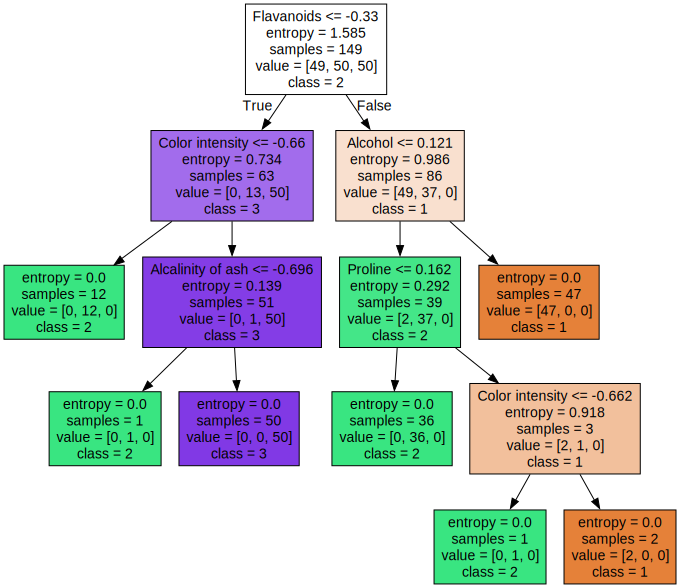

In [27]:
# Calling main function 
if __name__=="__main__": 
    main()